**Exercise 5 - Clustering**

---

In this exercise you will implement the KMeans clustering algorithm. The KMeans algorithm gather closer samples together by defining clusters. The idea is to find the K cluster centers which better divide the data. In this exercise you should implement the KMeans algorithm with random initialization. Then, implement the KMeans++ initialization method, which defines better initial cluster centers, to help achieving a better and quickier convergence.

In [1]:
# import libraries used during this exercise
# it may be necessary to uncomment the two following pip commands
#!pip3 install pandas
#!pip3 install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# the core.py file contains the plottings and other pre-defined functions please, do NOT change them.
from mlrcv.core import *
%matplotlib notebook
%matplotlib inline

In this exercise we will use a dataset with $x_1$, $x_2$ values where it's possible to notice that the points accumulates over some regions. This suggests that using a clustering algorithm (KMeans) it would be possible to divide the data, defining clusters that can separate the data points into distinct classes.

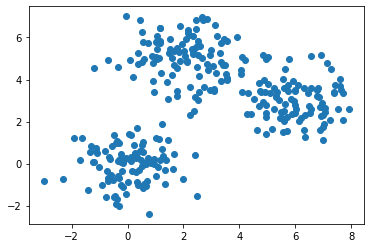

In [2]:
# Dataset read
df = pd.read_csv('data/kmeanspp.csv')
x = df.values
plot_dataset(x)

**5.1 KMeans \[6\]**

---

Given the loaded dataset $x_1,x_2$ you should implement the class functions in the *kmeans.py* file to find the K-clusters. You can test different values for *k_clusters* to check the algorithm behavior. In this first task the following functions should be implemented:

**KMeans class:**
- *euclidean_distance*: calculate the euclidean distance between the $x$ samples and the K-centers
- *init_random_centers*: randomly initialize the K-centers
- *fit*: use the input data $x$ to find the K-centers to divide the data
- *predict_c*: predict $c_{pred}$ clusters from input $x$

(**Note:** on the *kmeans.py* you can use this function call *plot_clusters(x, self)* to plot the clusters during the data fit, so you can follow the clusters centers convergence)


Initial centers from random initialization


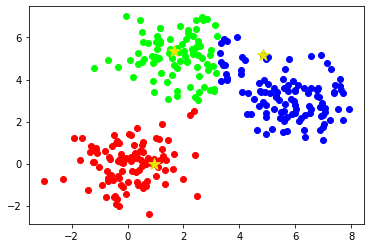

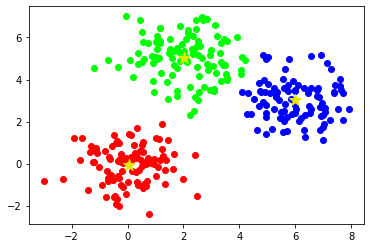

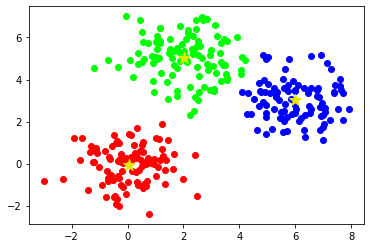

In [3]:
from mlrcv.kmeans import *

# KMeans with random initialization
kmeans = KMeans(k_clusters=3, init_method='rand')
kmeans.fit(x)

plot_clusters(x, kmeans)

After some iterations your algorithm should be able to divide the data in K diferent clusters. With *k_cluster=3* you should see a reasonable division of the data, with the centers (yellow stars) right on the middle of the clusters.

However, depending on your data and the random centers initialization the final clusters may not properly divide the data. This happens because, depending on the initial clusters position, the algorithm could converge to a local solution. To enforce this "bad" initialization, below we use a fixed center initialization to show one case of bad random initialization.

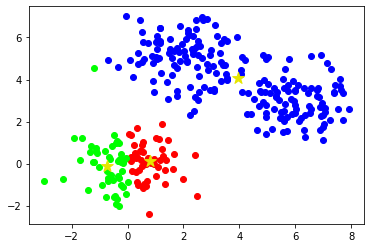

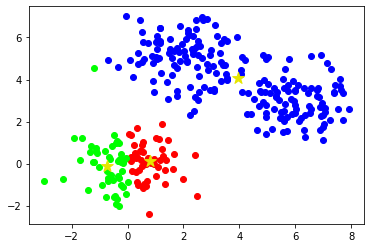

In [4]:
from mlrcv.kmeans import *

# KMeans with a specific example of failing with random initialization
kmeans = KMeans(k_clusters=3, init_method='fixed')
kmeans.fit(x)

plot_clusters(x, kmeans)

Clearly there is a better clusterization to divide this data, however the algorithm converge to a solution before arriving at this better solution. To solve that, we can use KMeans++ where instead of random initializing the cluster centers we sample fairly spread points around the data as the centers. This guarantee a better initialization of the cluster centers, arriving at better final clusterization.

**5.2 KMeans++ \[4\]**

---

In this second task you should implement the last missing function on the **KMeans** class, the *init_centers_kpp* method. The KMeans++ is an extension of the original KMeans algorithm, the difference is that the centers are not randomly initialized, a first random center is picked from the data, then, the following centers are picked using the distances between the selected centers to the other data samples as a probability distribution. This guarantee a more spread cluster centers, which should avoid overlapping clusters and a better initial guess for the clusters centers.

Initial centers from k++ initialization


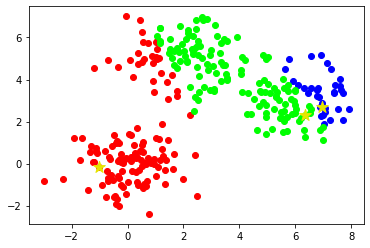

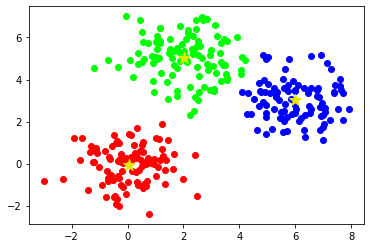

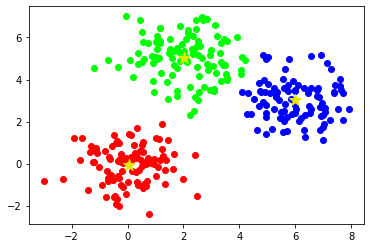

In [5]:
from mlrcv.kmeans import *

kmeans = KMeans(k_clusters=3, init_method='k++')
kmeans.fit(x)

plot_clusters(x, kmeans)

By using the KMeans++ initialization you should notice better distributed/spread initial cluster centers. This better spreading help the algorithm to converge faster and find better clusters, since the centers would already start in a position which could divide better the data. The advantage of KMeans++ is to find better initial cluster distributions, avoiding possible local solutions brought by the random initialization.

**Assignment Submission**

---

You should zip and submit the ```ex5_kmeans.ipynb``` file together with all the ```.py``` files inside the ```mlrcv/``` directory.

You can automatically generate the submission file using the provided ```zip_submission.sh``` script by running:

```
bash zip_submission.sh
```

This will zip the necessary files for your submission and generate the ```ex5_mlrcv_submission.zip``` file to be submit via ecampus.